This is a **pair-optional** assignment. Total: 20 points. Due:**<span style="color:red">  Sunday, October 15th, 10:00 pm </span>**.

**Objective**: Select a dataset, formulate a pertinent analytical question, and embark on a journey of data exploration to observe if the dataset holds answers to your question.

**Background**: Effective data analytics involves a blend of questioning, exploring, and experimenting. Your task is to embody these practices, seeking not necessarily to find clear-cut answers, but to immerse yourself in the iterative process of data analysis.

**Task Details**:

**`Dataset Selection`**:

Choose a dataset that piques your interest. It may be related to finance, healthcare, social sciences, or any other domain.
Ensure the dataset is rich enough to offer ample exploratory opportunities.

**`Formulate a Question`**:

Propose a relevant, challenging analytical question related to your chosen dataset.
This question should be exploratory in nature, e.g., “What factors influence the sale price of houses in a particular region?”

**`Data Exploration and Analysis Pipeline`**:

Engage in exploratory data analysis (EDA) and attempt to explore relationships, patterns, and anomalies in the data.
Utilize visualizations effectively to understand and communicate your findings.

**Guideline Steps**:

*Data Preprocessing:*
Handle missing values, outliers, and ensure data is of the correct type.

*Exploratory Data Analysis (EDA)*:
Utilize summary statistics and visualizations to understand data characteristics and relationships.

*Analysis*:
Based on your EDA, perform deeper analyses to explore your question.

**`Documentation and Reporting`**:
Clearly document your workflow, including code, visualizations, observations, and interim conclusions.
Mention clearly any assumptions and limitations encountered during your analysis.

**`Reflection`**:

Provide a reflection on your findings and the challenges encountered.
Mention any alternative approaches or additional analyses that could be undertaken in the future.

**`Assessment Criteria`**:

Your grade will not be based on whether you answer your question conclusively. Rather, the assessment will focus on:

* The robustness and relevance of your analytical question.
* The comprehensiveness and systematic approach of your data exploration and analysis.
* Your ability to articulate your findings, challenges, and learning through documentation and reflection.

**`Encouragement Note`**:

Remember, the objective is to learn and explore. Do not shy away from challenges and unknown territories. If a certain stage in the task demands new knowledge, take a pause and learn it. This is a safe space to try, fail, learn, and repeat. Your enthusiasm to navigate through challenges and your capacity to adapt and learn new things in the process will be celebrated.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import calendar
spotify = pd.read_csv('spotify-2023.csv')
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5



### 1. Fix the value in streams that keeps the column from being able to be called

In [99]:
spotify = spotify.replace({'streams': {'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3': 0}})
spotify.streams = spotify.streams.astype('int64')

### 2. Find the most played artist on spotify

In [100]:
spotify.groupby(by=['streams'])[['artist(s)_name']].max().sort_index(ascending=False).head(1)

,artist(s)_name
streams,
3703895074,The Weeknd


### 3. Find the average streams for all Taylor Swift songs.

In [101]:
spotify[spotify['artist(s)_name'] == 'Taylor Swift']['streams'].mean()

413342891.1764706

### 4. Find the Artist with the most songs listed.


In [102]:
spotify['artist(s)_name'].value_counts().head(1)

Taylor Swift    34
Name: artist(s)_name, dtype: int64

### 5. Make a pivot table representing the highest average streams for each released month and find out why

In [103]:
spotify.pivot_table(index=['released_month'], values='streams', aggfunc='mean')

,streams
released_month,
1,7.220770e+08
2,3.531535e+08
3,4.770526e+08
4,4.041460e+08
5,4.156691e+08
6,4.100447e+08
7,4.821765e+08
8,6.312657e+08
9,7.346444e+08


Two highest averages are during January and September. This is because on average most artists release albums during these months. There isn't much answer as to why its released during these two months, except for that these months are desired to release on.

### 6.  Determine the lowest danceability for each key type.

In [104]:
spotify.groupby('key')['danceability_%'].min()

key
A     23
A#    32
B     31
C#    34
D     33
D#    29
E     35
F     31
F#    39
G     24
G#    39
Name: danceability_%, dtype: int64

### 7. Find the most frequent month and year a song was released and output that month in calendar format

In [105]:
FM = spotify.groupby(['released_month', 'released_year']).size().sort_values(ascending=True)
print(FM)
year = 2022
month = 5 
print(calendar.month(year,month))

released_month  released_year
1               1930              1
8               2011              1
                2002              1
7               2019              1
                2017              1
                                 ..
3               2023             37
1               2022             37
10              2022             37
12              2022             48
5               2022             75
Length: 162, dtype: int64
      May 2022
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30 31



### 8. Find the highest streamed song for each month.

In [106]:
spotify.loc[spotify.groupby('released_month')['streams'].idxmax()][['released_month','streams','track_name']]

,released_month,streams,track_name
179,1,3562543890,Shape of You
724,2,2204080728,Something Just Like This
14,3,2513188493,As It Was
162,4,2713922350,One Dance
620,5,2864791672,Dance Monkey
71,6,2557975762,Heat Waves
84,7,2665343922,STAY (with Justin Bieber)
128,8,2355719893,lovely - Bonus Track
48,9,2565529693,Starboy
41,10,2808096550,Sunflower - Spider-Man: Into the Spider-Verse


### 9. For each mode find the highest and lowest energy percentage.

In [107]:
HighLow = spotify.groupby('mode')['energy_%']
print ([HighLow.min(),HighLow.max()])

[mode
Major     9
Minor    14
Name: energy_%, dtype: int64, mode
Major    97
Minor    97
Name: energy_%, dtype: int64]


### 10. Find all of the tracks that have the same released month, released year, and released day with another track

In [108]:
spotify[spotify[['released_month', 'released_year', 'released_day']].duplicated()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
11,Super Shy,NewJeans,1,2023,7,7,422,55,58255150,37,...,150,F,Minor,78,52,82,18,0,15,7
21,I Can See You (Taylor���s Version) (From The,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,123,F#,Major,69,82,76,6,0,6,3
25,SABOR FRESA,Fuerza Regida,1,2023,6,22,250,26,78300654,16,...,130,G,Minor,79,96,86,9,0,9,9
30,Rush,Troye Sivan,1,2023,7,13,864,78,22581161,71,...,126,F,Minor,74,35,84,0,0,11,6
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,...,120,NaN,Major,81,63,68,11,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### 11. Drop all the duplicate songs with the same BPM

In [109]:
spotify.drop_duplicates(subset=['bpm'])

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,La Corriente,"Tony Dize, Bad Bunny",2,2022,5,6,1796,8,479655659,8,...,196,B,Minor,66,58,79,23,0,22,20
786,Un Verano Sin Ti,Bad Bunny,1,2022,5,6,1004,1,283332261,8,...,188,F,Minor,50,41,50,69,0,12,6
820,Iris,The Goo Goo Dolls,1,1998,3,31,13101,9,1284942608,137,...,156,B,Minor,32,49,72,0,0,9,4
843,Grapejuice,Harry Styles,1,2022,5,20,1986,0,199587884,7,...,183,F,Major,65,88,72,36,14,20,3


### 12. Create a heat map that shows correlation between columns and analyze

<AxesSubplot:>

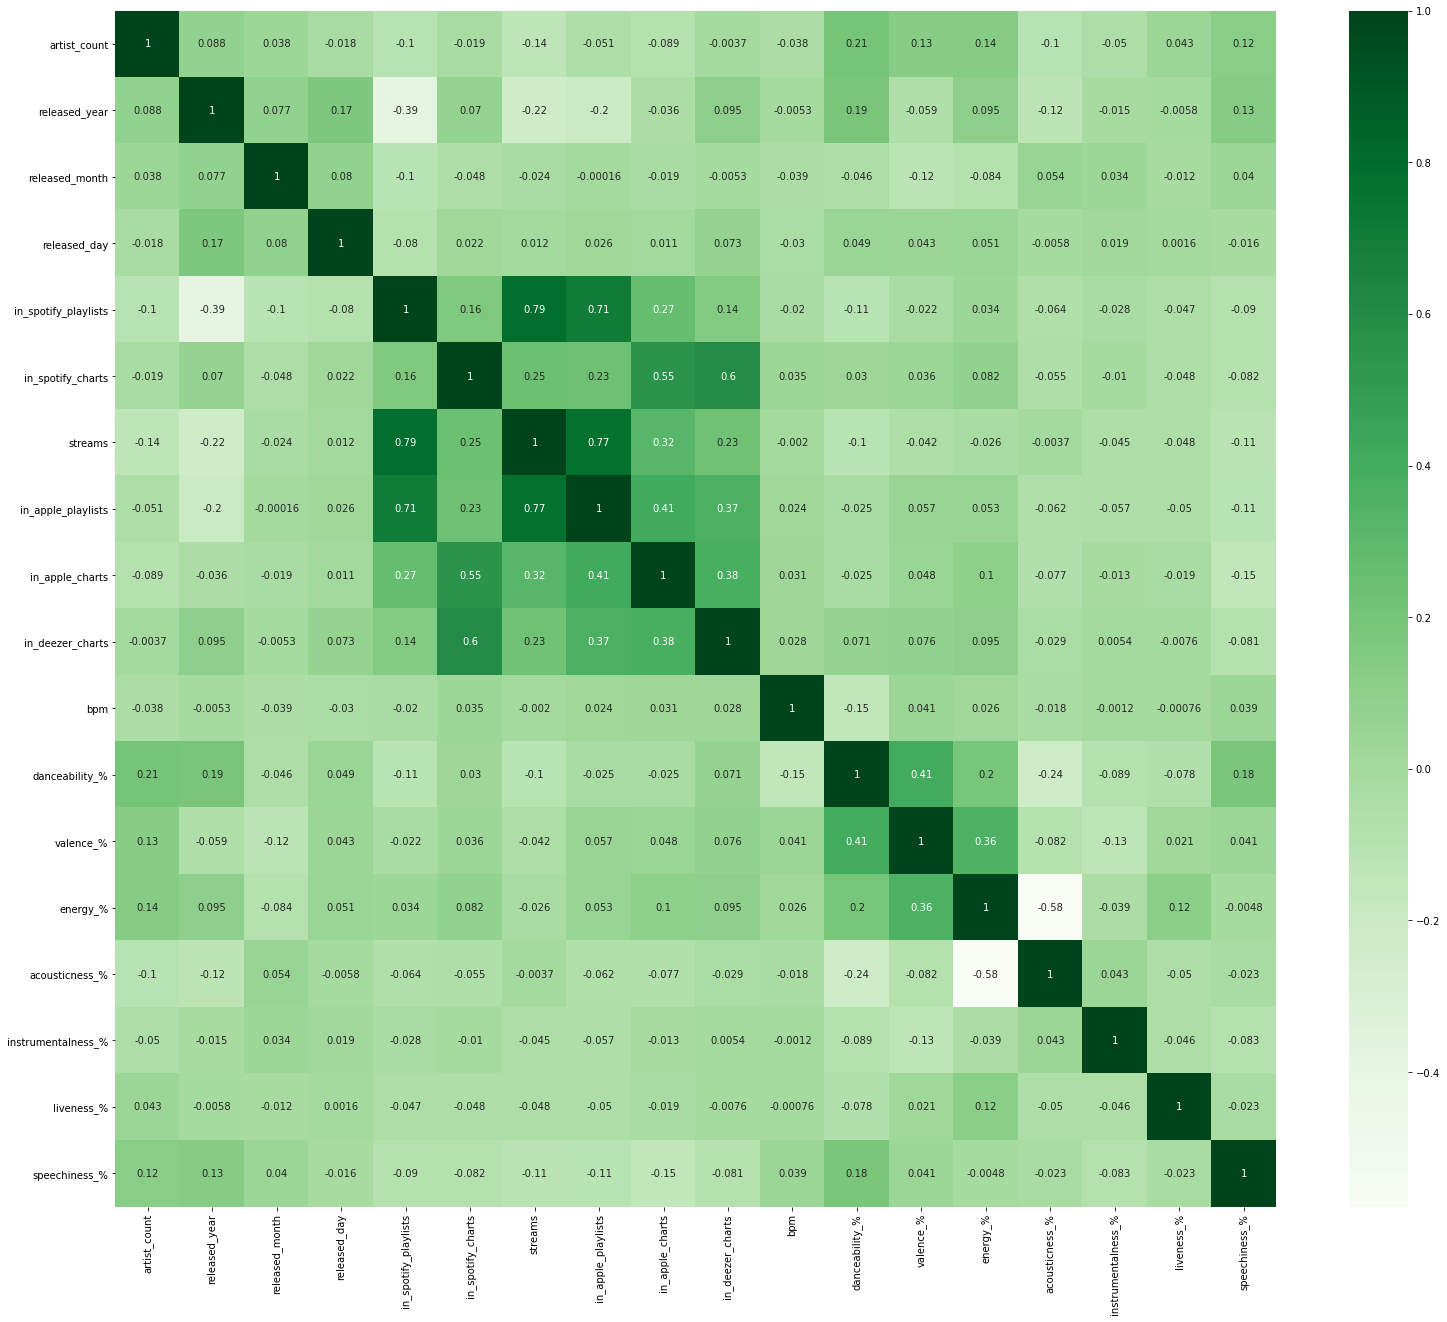

In [110]:
plt.figure(figsize=(26,22))
sns.heatmap(spotify.corr(),annot=True,cmap="Greens")

This heatmap is showing that there is a high correlation between amount of streams and the amount of playlists that a song is put into.
It shows that theres a slightly higher percentage of correlation (0.02) between stream and spotify playlists, compared to streams and apple playlists.

The most negative correlation is between acousticness and energy/danceability. Makes sense to assume that a song with less of a drum track would be harder to dance to.

### 14. Go further into correlation between danceability and acousticness by creating a liner regression graph

[Text(0.5, 1.0, 'Acoustic vs. Danceability')]

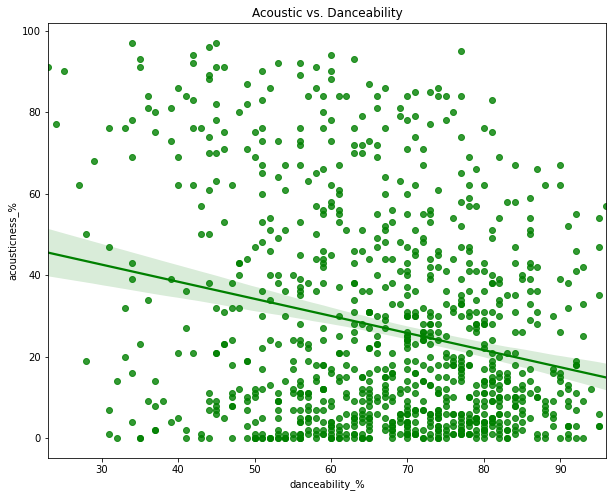

In [115]:
plt.figure(figsize=(10,8))
reg = sns.regplot(data = spotify, x='danceability_%', y='acousticness_%', color='g').set(title='Acoustic vs. Danceability')
reg

This shows that most of the points that are not on the line, fall below the line of best fit for a 'perfect' track based on the data.

Going off of the correlation from the heatmap, there is a negative correlation between these two columns. Where most of the songs actual lack acousticness making them more danceable. But based on the perfect balance only a small few fall on the predicted line.

### 15. Go even further and make a 3D graph that correlates these two columns with streams

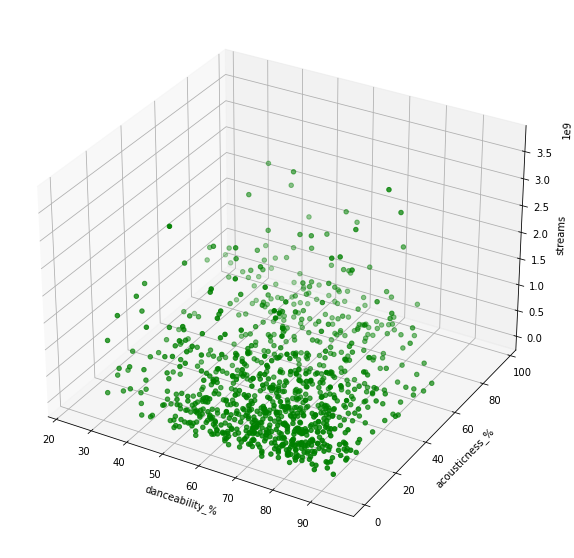

In [120]:
threed = plt.figure(figsize=(10,10)).gca(projection='3d')
threed.scatter(spotify['danceability_%'], spotify['acousticness_%'], spotify['streams'], color='g')
threed.set_xlabel('danceability_%')
threed.set_ylabel('acousticness_%')
threed.set_zlabel('streams')
plt.show()

This 3D graph shows not just the correlation between danceability and acoustiness, but also their correlation with streams. With the majority falling between 50-90% danceability, 10-40% acousticness and 500,000 to 1,000,000 streams.

### 16. Create a pivot table showing the average acousticness%, danceability%, energy%, instrumentalness%, liveness%, speechiness%, and valence% for each artist.

In [113]:
spotify.pivot_table(index=['artist(s)_name'], values=['danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%'])

,acousticness_%,danceability_%,energy_%,instrumentalness_%,liveness_%,speechiness_%,valence_%
artist(s)_name,,,,,,,
(G)I-DLE,3.5,77.5,87.0,0.0,37.5,11.5,67.0
"21 Savage, Gunna",0.0,68.0,73.0,0.0,7.0,7.0,29.0
"24kgoldn, Iann Dior",22.0,70.0,72.0,0.0,27.0,4.0,76.0
50 Cent,26.0,90.0,71.0,0.0,7.0,37.0,79.0
"A$AP Rocky, Metro Boomin, Roisee",4.0,60.0,53.0,0.0,21.0,4.0,13.0
...,...,...,...,...,...,...,...
j-hope,1.0,78.0,72.0,0.0,11.0,4.0,31.0
"j-hope, J. Cole",53.0,68.0,82.0,0.0,9.0,13.0,81.0
sped up 8282,42.0,74.0,73.0,0.0,9.0,4.0,75.0
